In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BuildTardisData import linear_data
from BacktestStrategy import backtest_strategy

In [2]:
l, d = 1, 2

In [8]:
def calculate_sharpe_ratio(returns_data, risk_free_rate):
    
    # Calculate portfolio returns and volatility
    portfolio_returns = np.mean(returns_data)
    portfolio_volatility = np.std(returns_data)

    # Calculate excess returns
    excess_returns = portfolio_returns - risk_free_rate

    # Calculate Sharpe ratio
    sharpe_ratio = excess_returns / portfolio_volatility

    return sharpe_ratio

### Backtesting results for past 3 months data (Reinvesting Profits)

**Assumptions:**
1. Initial Portfolio Value = $30,000
2. This includes the price to take one position at day open plus maintenance margin
3. Position size is increased when profits cross multiples of 30,000

In [3]:
def read_datasets():
    
    # Get all file names in the directory
    quotes, trades = os.listdir("D:\Quotes"), os.listdir("D:\Trades")
    
    # Loop through each file
    for quote, trade in zip(quotes, trades):
        
        file_path_q = os.path.join("D:\Quotes", quote)
        file_path_t = os.path.join("D:\Trades", trade)
            
        # Read the dataset using pandas
        df1 = pd.read_csv(file_path_q)
        df2 = pd.read_csv(file_path_t)
    
        # Yield combined dataset
        yield linear_data(df1, df2, l=l, d=d, mpb='updated'), quote[23:33]

In [ ]:
size = 0
Profits_dict = {}
datasets = read_datasets()
train, date = next(datasets)
for i in range(1,31):
    test, date = next(datasets)
    df = backtest_strategy(train, test, threshold=0.1, l=l, optimise=True, position_size=(1+size))
    train = test
    Profits_dict[date] = sum(df["Trade Cost"])
    size = sum(Profits_dict.values())//30_000

In [17]:
profits_df = pd.DataFrame(Profits_dict.values(), Profits_dict.keys(), columns=["Profit"])
profits_df

,Profit
2022-12-29,7.232100e+03
2022-12-30,5.947400e+03
2022-12-31,3.085700e+03
2023-01-01,1.393100e+03
2023-01-02,2.851400e+03
2023-01-03,4.957700e+03
2023-01-04,7.869000e+03
2023-01-05,9.235400e+03
2023-01-06,8.785800e+03
2023-01-07,2.428400e+03


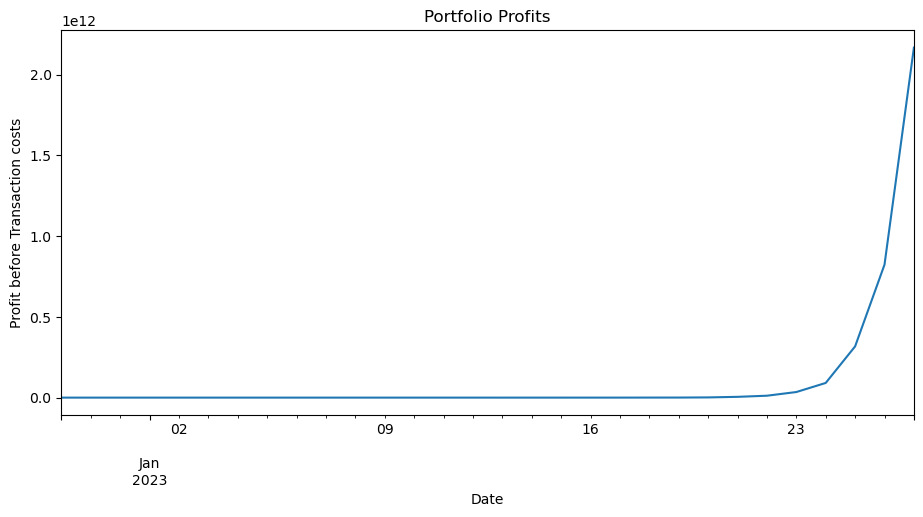

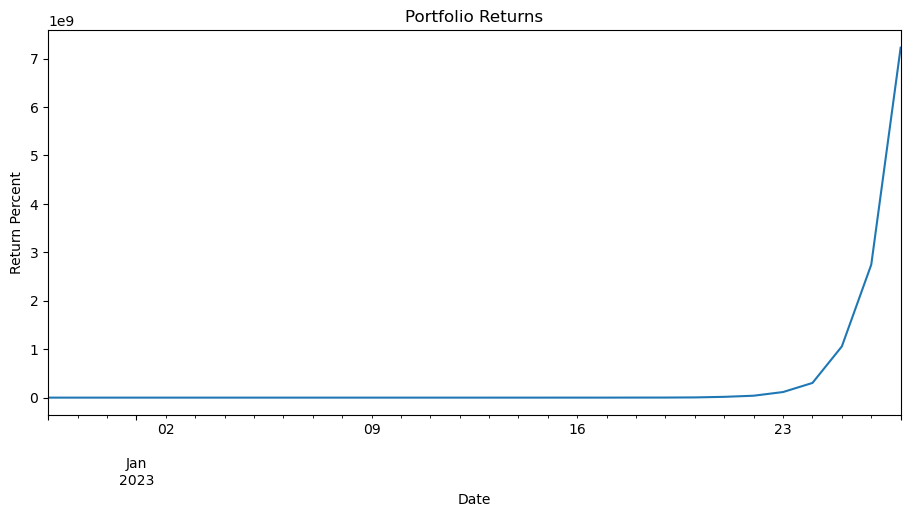

In [18]:
profits_df.index = pd.to_datetime(profits_df.index)
plt.title('Portfolio Profits')
profits_df["Profit"].plot(figsize=(11,5))
plt.xlabel('Date')
plt.ylabel('Profit before Transaction costs')
plt.show()
profits_df["Return Percent"] = (profits_df["Profit"]/30_000)*100
plt.title('Portfolio Returns')
profits_df["Return Percent"].plot(figsize=(11,5))
plt.xlabel('Date')
plt.ylabel('Return Percent')
plt.show()

In [19]:
display("Sharpe Ratio of the Portfolio is:", calculate_sharpe_ratio(profits_df["Return Percent"], 4.5))

'Sharpe Ratio of the Portfolio is:'

0.2794037096272631

In [20]:
np.std(profits_df["Return Percent"])

1373339598.4325378

Well going from $30k to 2 trillion in a month, with a 7 billion percent return. I can't complain!

Of course this exponential growth is not possible! Results such as this are testament to why backtests are necessary to give us an idea of how the strategy can perform in the ideal world but not how it will in the real. Comparing to the backtest where we only take one position, you would have noticed that the return often exceed 100 percent. THis is why in case of reinvesting, the comunding effect blows up here. Therefore, I have capped the position size at 4 contracts. The backtesting results for the same are below:
    

In [4]:
size = 0
Profits_dict = {}
datasets = read_datasets()
train, date = next(datasets)
for i in range(1,122):
    test, date = next(datasets)
    df = backtest_strategy(train, test, threshold=0.1, l=l, optimise=True, position_size=(1+size))
    train = test
    Profits_dict[date] = sum(df["Trade Cost"])
    size = min(sum(Profits_dict.values())//30_000, 4)
    if i%50 == 0:
        print(Profits_dict)

{'2022-12-29': 7232.10000000065, '2022-12-30': 5947.400000000231, '2022-12-31': 3085.7000000003354, '2023-01-01': 1393.100000000013, '2023-01-02': 2851.4000000001142, '2023-01-03': 4957.7000000003645, '2023-01-04': 7869.000000000178, '2023-01-05': 9235.400000000103, '2023-01-06': 8785.800000000105, '2023-01-07': 2428.400000000169, '2023-01-08': 560.7999999999738, '2023-01-09': 23263.400000000423, '2023-01-10': 26081.40000000046, '2023-01-11': 42361.200000001496, '2023-01-12': 240370.5, '2023-01-13': 274715.0, '2023-01-14': 470336.5, '2023-01-15': 242830.0, '2023-01-16': 341267.0, '2023-01-17': 286766.5, '2023-01-18': 364637.0, '2023-01-19': 152606.0, '2023-01-20': 240128.5, '2023-01-21': 352500.0, '2023-01-22': 256078.5, '2023-01-23': 277283.5, '2023-01-24': 255641.0, '2023-01-25': 329976.0, '2023-01-26': 267680.5, '2023-01-27': 253054.0, '2023-01-28': 83590.5, '2023-01-29': 191148.0, '2023-01-30': 298315.5, '2023-01-31': 203795.0, '2023-02-01': 241944.5, '2023-02-02': 307764.0, '2023-

In [5]:
profits_df = pd.DataFrame(Profits_dict.values(), Profits_dict.keys(), columns=["Profit"])
profits_df

,Profit
2022-12-29,7232.1
2022-12-30,5947.4
2022-12-31,3085.7
2023-01-01,1393.1
2023-01-02,2851.4
...,...
2023-04-24,268768.0
2023-04-25,233282.5
2023-04-26,439592.0
2023-04-27,490376.0


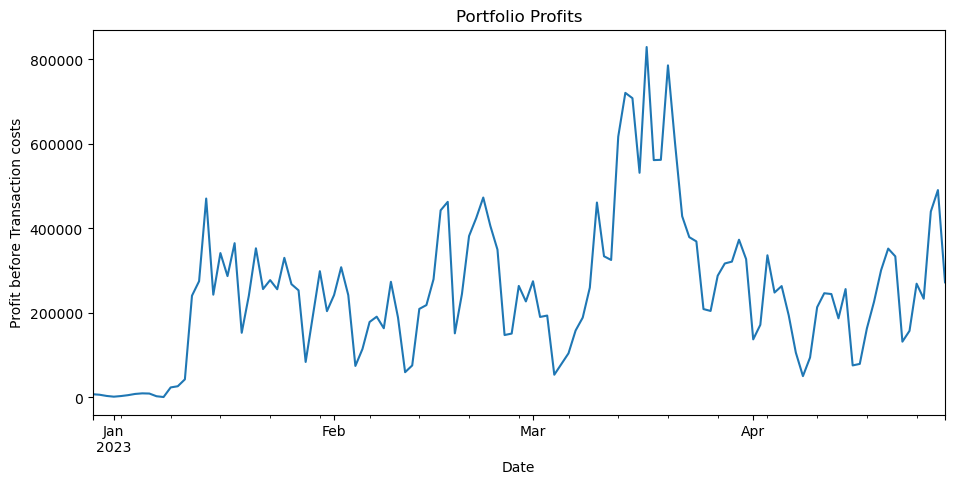

In [6]:
profits_df.index = pd.to_datetime(profits_df.index)
plt.title('Portfolio Profits')
profits_df["Profit"].plot(figsize=(11,5))
plt.xlabel('Date')
plt.ylabel('Profit before Transaction costs')
plt.show()

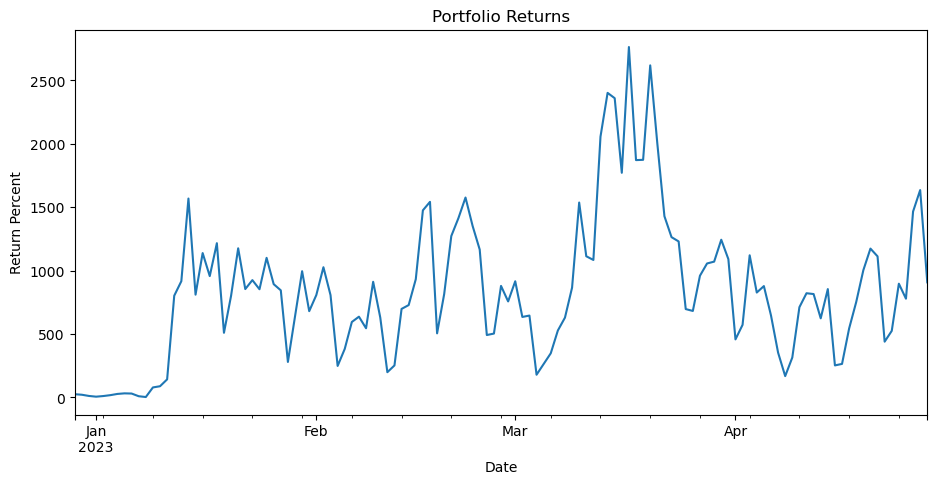

In [7]:
profits_df["Return Percent"] = (profits_df["Profit"]/30_000)*100
plt.title('Portfolio Returns')
profits_df["Return Percent"].plot(figsize=(11,5))
plt.xlabel('Date')
plt.ylabel('Return Percent')
plt.show()

In [9]:
display("Sharpe Ratio of the Portfolio is:", calculate_sharpe_ratio(profits_df["Return Percent"], 4.5))

'Sharpe Ratio of the Portfolio is:'

1.472829770827569

In [10]:
np.std(profits_df["Return Percent"])

567.0866582757595

Much more volatile for obvious reasons as the deviation from the mean keeps compounding due to compounding position size.

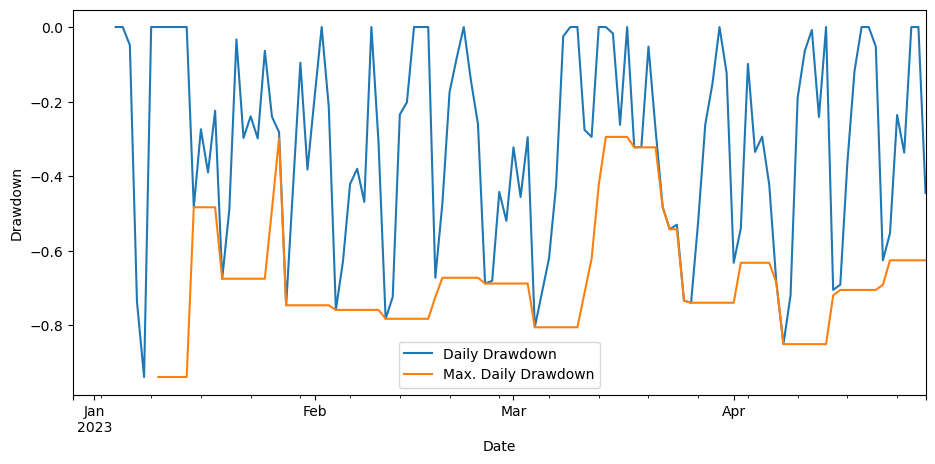

In [11]:
# We are going to use a trailing 1 trading day window
window = 7

# Calculate the max drawdown in the past window days for each day in the series.
Roll_Max = profits_df["Return Percent"].rolling(window).max()
Daily_Drawdown = profits_df["Return Percent"]/Roll_Max - 1.0

# Next we calculate the minimum (negative) daily drawdown in that window.
# Again, use min_periods=1 if you want to allow the expanding window
Max_Daily_Drawdown = Daily_Drawdown.rolling(window).min()

# Plot the results
Daily_Drawdown.plot(figsize=(11,5), label='Daily Drawdown')
Max_Daily_Drawdown.plot(figsize=(11,5), label='Max. Daily Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

The returns we see here are of course very unrealistic and the strategy is quite volatile, but what can be said is that it does seems to work and be a reasonable predictor of price change enough to be profitable. How profitable is better decided live!